In [1]:
import sys
import os
import numpy as np
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['text.usetex'] = True

In [2]:
sys.path.append(r"C:\Users\d80084\Google Drive\01oxford\7 Thesis\code\quasigaussian")

In [3]:
from quassigaussian.montecarlo.simulations import ProcessSimulatorAnnuity
from quassigaussian.volatility.local_volatility import LinearLocalVolatility, BlackVolatilityModel 
from quassigaussian.ploting.plot_approximations import ApproximatorPlotter
from quassigaussian.products.pricer import AnnuityPricer, BondPricer, SwapPricer, SwaptionPricer
from quassigaussian.products.instruments import Annuity, Swap, Swaption
from quassigaussian.montecarlo.monte_carlo_pricer import monte_carlo_pricer_annuity

In [4]:
from qgtests.utis import get_mock_yield_curve_const

In [5]:
from quassigaussian.montecarlo.simulations import ResultSimulatorObj

In [6]:
kappa = 0.2
rate = 0.06
time_grid = np.arange(0, 31)
initial_curve = get_mock_yield_curve_const(rate)

linear_local  = LinearLocalVolatility.from_const(30, 0.5, 0.06, 0.2)

swap_pricer = SwapPricer(initial_curve, kappa=kappa)


In [7]:
swap_T0 = 5
swap_TN = 10
frequency = 0.5
coupon = 0.062

In [8]:
number_samples = 2048
number_steps = 256

t_horizon = swap_T0
dt = t_horizon/number_steps


In [9]:
bond_pricer = BondPricer(initial_curve, kappa)
annuity_pricer = AnnuityPricer(bond_pricer)
swap = Swap(swap_T0, swap_TN, frequency)
annuity = Annuity(swap.bond_list, frequency)
swaption = Swaption(swap_T0, coupon, swap)
swaption_pricer = SwaptionPricer(swap_pricer)

In [11]:
random_number_generator_type = "normal"

x_simulator = ProcessSimulatorAnnuity(number_samples, number_steps, dt, random_number_generator_type, swap.annuity, annuity_pricer)

In [12]:
local_volatility = linear_local

In [13]:
local_volatility.calculate_vola(10,0,0)

0.03

In [14]:
#res = x_simulator.simulate_xy(kappa=kappa, local_volatility=local_volatility)

In [15]:
res2 = x_simulator.simulate_xy(kappa=kappa, local_volatility=local_volatility, parallel_simulation=True)

In [16]:
res2.x.shape

(2048, 257)

In [17]:
res2.x_bar

array([ 0.00000000e+00, -6.79824563e-05, -1.34014582e-04, -2.03562250e-04,
       -2.67138309e-04, -3.28784711e-04, -3.91106160e-04, -4.49733691e-04,
       -5.18443890e-04, -5.90581779e-04, -6.47805696e-04, -7.05836257e-04,
       -7.68996092e-04, -8.28143560e-04, -8.91044296e-04, -9.47424008e-04,
       -1.01467525e-03, -1.07127801e-03, -1.11543859e-03, -1.16767612e-03,
       -1.22588917e-03, -1.27767714e-03, -1.32953388e-03, -1.38683720e-03,
       -1.44017117e-03, -1.49966207e-03, -1.55385631e-03, -1.61879297e-03,
       -1.66608169e-03, -1.71005849e-03, -1.76916032e-03, -1.81205285e-03,
       -1.86878041e-03, -1.92568300e-03, -1.97979827e-03, -2.03886558e-03,
       -2.08633306e-03, -2.12549225e-03, -2.17303408e-03, -2.22135635e-03,
       -2.25760409e-03, -2.29480218e-03, -2.32635661e-03, -2.37643573e-03,
       -2.42915681e-03, -2.45292229e-03, -2.51936712e-03, -2.55763268e-03,
       -2.59777747e-03, -2.63310257e-03, -2.64943999e-03, -2.66709086e-03,
       -2.69500437e-03, -

In [18]:
res2.x[100]

array([ 0.        ,  0.00371175,  0.00502823,  0.00725683,  0.01187707,
        0.00959871,  0.012924  ,  0.01788838,  0.02556468,  0.0203572 ,
        0.0220332 ,  0.01754611,  0.01295112,  0.01440217,  0.01461739,
        0.01952624,  0.01783372,  0.01709946,  0.01790159,  0.0139344 ,
        0.01064155,  0.01538123,  0.01283568,  0.01789104,  0.020453  ,
        0.01337554,  0.0155828 ,  0.01776236,  0.01950662,  0.018732  ,
        0.01440724,  0.02020443,  0.01960693,  0.01552115,  0.0174167 ,
        0.01399215,  0.00971316,  0.00799276,  0.0050413 ,  0.00107816,
        0.00441466,  0.00385963,  0.00910951,  0.00532761, -0.00211773,
       -0.00153946,  0.00615878,  0.00835441,  0.0221252 ,  0.02347503,
        0.02438934,  0.01446391,  0.0162341 ,  0.01686165,  0.01493724,
        0.01422371,  0.0138166 ,  0.01292155,  0.02195861,  0.02014928,
        0.02077444,  0.01882902,  0.02219389,  0.02284962,  0.021444  ,
        0.01265574,  0.01362118,  0.01216277,  0.01180289,  0.00

In [433]:
res2.x[1]

array([ 0.        ,  0.03954305,  0.0094361 ,  0.02026902,  0.04276886,
        0.00490438, -0.00178765, -0.1194806 , -0.15718482, -0.16877615,
       -0.2126412 , -0.16332807, -0.2132352 , -0.23011685, -0.22864345,
       -0.1855551 , -0.23494913, -0.20070089, -0.20316798, -0.23742918,
       -0.22530474, -0.22152931, -0.24319976, -0.24337982, -0.25789082,
       -0.25656905, -0.23803343, -0.19023162, -0.23284385, -0.16758968,
       -0.2339959 , -0.24108198, -0.22471786, -0.21808729, -0.24027661,
       -0.24900269, -0.26658386, -0.2869085 , -0.26239867, -0.25315472,
       -0.27687877, -0.25071011, -0.24299583, -0.21933672, -0.20139608,
       -0.23026107, -0.25004192, -0.22839803, -0.2110076 , -0.21376577,
       -0.21206788, -0.17325828, -0.1947912 , -0.17929121, -0.1880636 ,
       -0.19723043, -0.16391937, -0.13923539, -0.114813  , -0.07386526,
       -0.07599083, -0.05568935, -0.069211  , -0.06100347, -0.06828062,
       -0.06775203, -0.05027148, -0.08113573, -0.01301561, -0.05

In [434]:
res2.x.mean(axis=0)

array([ 0.        , -0.004721  , -0.009367  , -0.01398421, -0.01849437,
       -0.02293202, -0.02731969, -0.03162165, -0.03595266, -0.04025738,
       -0.04438611, -0.04846958, -0.05254288, -0.0565323 , -0.06050157,
       -0.06436829, -0.06827235, -0.07204184, -0.07566341, -0.07930223,
       -0.08294216, -0.08648624, -0.08998365, -0.09348086, -0.09689958,
       -0.10032403, -0.10366383, -0.10704447, -0.11024323, -0.11337214,
       -0.1165786 , -0.1196172 , -0.12272422, -0.12579242, -0.12879679,
       -0.13180169, -0.13467838, -0.13745159, -0.14025183, -0.14302168,
       -0.14565997, -0.14827021, -0.15080333, -0.15343987, -0.15606185,
       -0.15842705, -0.16108743, -0.1634963 , -0.16588647, -0.16820626,
       -0.17035181, -0.17247754, -0.17464862, -0.176795  , -0.17890897,
       -0.18111975, -0.18325219, -0.18549361, -0.18755655, -0.18945857,
       -0.19138975, -0.19340617, -0.19542235, -0.19744854, -0.19917939,
       -0.20097208, -0.20283457, -0.20461432, -0.20639088, -0.20

In [435]:
res2.x_bar

array([ 0.        , -0.004721  , -0.009367  , -0.01398421, -0.01849437,
       -0.02293202, -0.02731969, -0.03162165, -0.03595266, -0.04025738,
       -0.04438611, -0.04846958, -0.05254288, -0.0565323 , -0.06050157,
       -0.06436829, -0.06827235, -0.07204184, -0.07566341, -0.07930223,
       -0.08294216, -0.08648624, -0.08998365, -0.09348086, -0.09689958,
       -0.10032403, -0.10366383, -0.10704447, -0.11024323, -0.11337214,
       -0.1165786 , -0.1196172 , -0.12272422, -0.12579242, -0.12879679,
       -0.13180169, -0.13467838, -0.13745159, -0.14025183, -0.14302168,
       -0.14565997, -0.14827021, -0.15080333, -0.15343987, -0.15606185,
       -0.15842705, -0.16108743, -0.1634963 , -0.16588647, -0.16820626,
       -0.17035181, -0.17247754, -0.17464862, -0.176795  , -0.17890897,
       -0.18111975, -0.18325219, -0.18549361, -0.18755655, -0.18945857,
       -0.19138975, -0.19340617, -0.19542235, -0.19744854, -0.19917939,
       -0.20097208, -0.20283457, -0.20461432, -0.20639088, -0.20

In [436]:
res2.x.std(axis=0)/np.sqrt(2048)

array([0.        , 0.00080513, 0.00111792, 0.00132771, 0.0015373 ,
       0.00172835, 0.00188479, 0.00205208, 0.00214524, 0.00221559,
       0.00234433, 0.00245187, 0.00254098, 0.00263311, 0.00271189,
       0.00280022, 0.00284506, 0.00292694, 0.00303679, 0.00312018,
       0.00318645, 0.00326061, 0.00332569, 0.00337019, 0.00342103,
       0.00345795, 0.00350769, 0.00352699, 0.00358389, 0.00365051,
       0.00367943, 0.00373821, 0.00376073, 0.00378067, 0.00380693,
       0.00382844, 0.00387148, 0.00392543, 0.00396161, 0.00399528,
       0.0040505 , 0.00409976, 0.00416047, 0.0041824 , 0.00419654,
       0.00426502, 0.00424166, 0.00428075, 0.00431038, 0.00434299,
       0.00441814, 0.00448981, 0.00453665, 0.00458138, 0.00462467,
       0.0046377 , 0.00465882, 0.00464336, 0.00466079, 0.00471522,
       0.00475108, 0.00475408, 0.00475201, 0.00473933, 0.00478684,
       0.00481365, 0.00481471, 0.00483296, 0.00484426, 0.00486459,
       0.00487298, 0.00491858, 0.00495483, 0.00499508, 0.00501

In [437]:
res2.x_std/np.sqrt(32)

array([0.        , 0.00074088, 0.00088892, 0.00114627, 0.0017447 ,
       0.00165213, 0.00192594, 0.00230149, 0.00236026, 0.00249001,
       0.00232542, 0.00245522, 0.0023844 , 0.0024958 , 0.00265008,
       0.00266017, 0.0029325 , 0.00294559, 0.00337459, 0.00309725,
       0.00333095, 0.00322994, 0.00333499, 0.00353925, 0.0034433 ,
       0.00328255, 0.00328837, 0.00335362, 0.0034355 , 0.003497  ,
       0.00349147, 0.0034987 , 0.00335754, 0.00365815, 0.0035813 ,
       0.00345613, 0.00359432, 0.00371102, 0.0039319 , 0.00417467,
       0.00421276, 0.00421936, 0.00407153, 0.00431223, 0.00451791,
       0.00462304, 0.00442935, 0.00451392, 0.0048158 , 0.00487759,
       0.00471654, 0.0048395 , 0.00485539, 0.00475244, 0.00474509,
       0.00494332, 0.00469392, 0.00469961, 0.00456344, 0.00478707,
       0.00461274, 0.00449997, 0.00452893, 0.00472211, 0.00478511,
       0.00480895, 0.00480706, 0.00520525, 0.00515218, 0.00532957,
       0.00559351, 0.0055296 , 0.00545714, 0.00559077, 0.00543

In [438]:
res2.x_bar

array([ 0.        , -0.004721  , -0.009367  , -0.01398421, -0.01849437,
       -0.02293202, -0.02731969, -0.03162165, -0.03595266, -0.04025738,
       -0.04438611, -0.04846958, -0.05254288, -0.0565323 , -0.06050157,
       -0.06436829, -0.06827235, -0.07204184, -0.07566341, -0.07930223,
       -0.08294216, -0.08648624, -0.08998365, -0.09348086, -0.09689958,
       -0.10032403, -0.10366383, -0.10704447, -0.11024323, -0.11337214,
       -0.1165786 , -0.1196172 , -0.12272422, -0.12579242, -0.12879679,
       -0.13180169, -0.13467838, -0.13745159, -0.14025183, -0.14302168,
       -0.14565997, -0.14827021, -0.15080333, -0.15343987, -0.15606185,
       -0.15842705, -0.16108743, -0.1634963 , -0.16588647, -0.16820626,
       -0.17035181, -0.17247754, -0.17464862, -0.176795  , -0.17890897,
       -0.18111975, -0.18325219, -0.18549361, -0.18755655, -0.18945857,
       -0.19138975, -0.19340617, -0.19542235, -0.19744854, -0.19917939,
       -0.20097208, -0.20283457, -0.20461432, -0.20639088, -0.20

In [439]:
n_scrambles = 32

In [440]:
paths_scramble = 2048/32

In [441]:
for i in range(0, n_scrambles):
    from_i = int(i*paths_scramble)
    to_i = int((i+1)*paths_scramble)
    print(from_i, to_i)
    ##@x_tmp.append(np.mean(simulations[from_i:to_i], axis=0))

0 64
64 128
128 192
192 256
256 320
320 384
384 448
448 512
512 576
576 640
640 704
704 768
768 832
832 896
896 960
960 1024
1024 1088
1088 1152
1152 1216
1216 1280
1280 1344
1344 1408
1408 1472
1472 1536
1536 1600
1600 1664
1664 1728
1728 1792
1792 1856
1856 1920
1920 1984
1984 2048


In [207]:
np.mean(res2.x[0:32], axis=0)

array([ 0.00000000e+00,  5.83207969e-05, -1.58233209e-04, -9.40206904e-05,
        2.62649401e-04,  4.42724950e-04,  5.74350694e-04,  3.52075197e-04,
        6.44700174e-04,  1.18023865e-03,  1.14605847e-03,  9.13582313e-04,
        5.11501423e-04,  3.81548145e-04,  6.65082110e-04,  4.38358395e-04,
        1.36761818e-05,  6.11255639e-05,  1.63890783e-04, -1.30595932e-04,
        5.64678416e-05,  9.87846473e-04,  3.33436747e-04, -4.83443946e-04,
       -1.05623868e-03, -8.59873002e-04, -1.21191202e-03, -1.76150238e-03,
       -1.63549739e-03, -1.66715801e-03, -1.63691880e-03, -1.53587092e-03,
       -1.51286485e-03, -7.55530177e-04, -9.11599502e-04, -7.02840055e-04,
       -1.14227952e-03, -1.32797378e-03, -1.31198894e-03, -1.17497088e-03,
       -1.28079116e-03, -1.59921158e-03, -1.70997450e-03, -1.53149507e-03,
       -9.65868461e-04, -6.35460645e-04, -4.32509163e-04, -9.86291361e-05,
       -1.09019174e-03, -1.56155944e-03, -9.05914847e-04, -6.54650567e-04,
       -1.61421570e-03, -

In [208]:
res2.x[:,0]


array([0., 0., 0., ..., 0., 0., 0.])

In [94]:
res2.std

AttributeError: 'ResultSimulatorObj' object has no attribute 'std'

In [95]:
res2.x[-1,:].mean()

0.006406598749620445

In [23]:
res2.x[:,-1]

array([-0.36439628, -0.04418523,  0.04960819, ..., -0.72461957,
       -0.38159846, -0.07755137])

In [24]:
bond_simuation = annuity_pricer.annuity_price(0, 0, 0, annuity) * 1/annuity_pricer.annuity_price(t_horizon, res2.x[:, -1], res2.y[:, -1], annuity)

In [25]:
np.exp(-rate*swap_T0)

0.7866278610665535

In [26]:
np.mean(bond_simuation)

0.786601442217317

In [27]:
np.std(bond_simuation)*3/np.sqrt(number_samples)

0.00977191748142192

In [28]:
expected_bond_annuity = 1/annuity_pricer.annuity_price(t_horizon, res2.x[:, -1], res2.y[:, -1], annuity)

In [29]:
np.std(expected_bond_annuity)*3/np.sqrt(200)

0.055124049563312884

In [30]:
avg_bond =  annuity_pricer.annuity_price(0, 0, 0, annuity) * np.mean(expected_bond_annuity)

In [31]:
np.exp(-0.06)

0.9417645335842487

In [32]:
np.mean(avg_bond)

0.786601442217317

In [33]:
mc_price = monte_carlo_pricer(res2, swaption, swaption_pricer)

NameError: name 'monte_carlo_pricer' is not defined

In [34]:
res2.x[:, -1]

array([-0.36439628, -0.04418523,  0.04960819, ..., -0.72461957,
       -0.38159846, -0.07755137])

In [29]:
mc_price.shape

(3600,)

In [30]:
mc_price.mean()

0.017662672312529003

In [31]:
mc_price.mean() + 3*mc_price.std()/np.sqrt(res2.x.shape[0])

0.018828059823753244

In [32]:
mc_price.mean() - 3*mc_price.std()/np.sqrt(res2.x.shape[0])

0.016497284801304763

In [33]:
mc_price.mean() + 3*mc_price.std()/np.sqrt(res2.x.shape[0])

0.018828059823753244

In [34]:
mc_price.mean() - 3*mc_price.std()/np.sqrt(res2.x.shape[0])

0.016497284801304763

In [35]:
######################################################

In [22]:
approximation_plotter = ApproximatorPlotter()

In [23]:
res2.annuity_measure = "as"

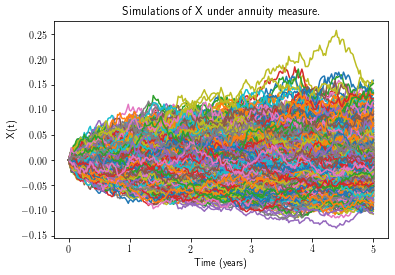

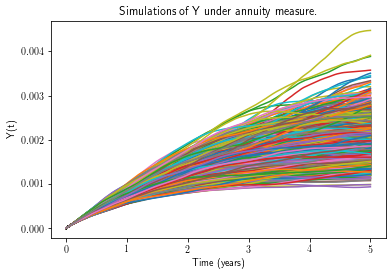

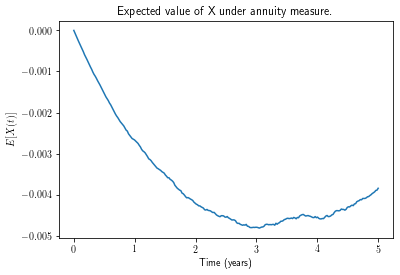

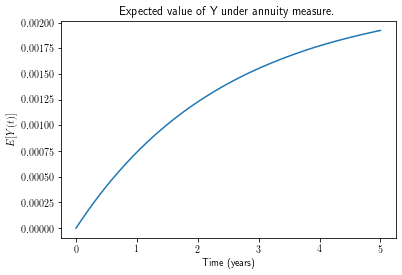

In [24]:
approximation_plotter.plot_xy_approximation(res2)

In [213]:
from quassigaussian.fastcalibration.approximation import PiterbargApproximator

piterbarg_approx = PiterbargApproximator(linear_local, swap_pricer)

ImportError: cannot import name 'PiterbargApproximator' from 'quassigaussian.fastcalibration.approximation' (C:\Users\d80084\Google Drive\01oxford\7 Thesis\code\quasigaussian\quassigaussian\fastcalibration\approximation.py)

In [ ]:
def test_pitebarg_approx(swap, time_grid):
    
    y_bar = np.zeros(len(time_grid))
    x0 = np.zeros(len(time_grid))
    x_bar = np.zeros(len(time_grid))
    
    swap_0 = piterbarg_approx.swap_pricer.price(swap, 0, 0, 0)
    for i in range(0,len(time_grid)):
        t = time_grid[i]
        y_bar[i] = piterbarg_approx._calculate_ybar(t)
        x0[i] = piterbarg_approx._calculate_x0(t, swap, swap_0, y_bar[i])
        x_bar[i] = piterbarg_approx._calculate_xbar(t, y_bar[i], swap, swap_0)

    return x0, x_bar, y_bar

In [ ]:
x0, x_bar, y_bar = test_pitebarg_approx(swap, res2.time_grid)

In [448]:
res2.x_bar.shape

(257,)

Text(0, 0.5, 'x Value')

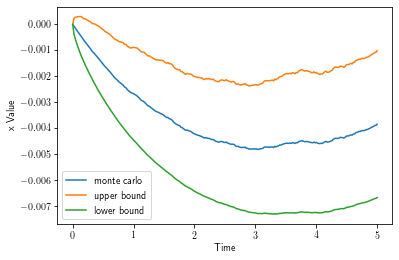

In [19]:
plt.figure()
plt.plot(res2.time_grid, res2.x_bar, label="monte carlo")
plt.plot(res2.time_grid, res2.x_bar+3*res2.x.std(axis=0)/np.sqrt(res2.number_samples), label="upper bound")
plt.plot(res2.time_grid, res2.x_bar-3*res2.x.std(axis=0)/np.sqrt(res2.number_samples), label="lower bound")

#plt.plot(res2.time_grid, x0, label="x0")
#plt.plot(res2.time_grid, x_bar, label="xbar")
plt.legend()
plt.xlabel("Time")
plt.ylabel("x Value")

Text(0, 0.5, 'y')

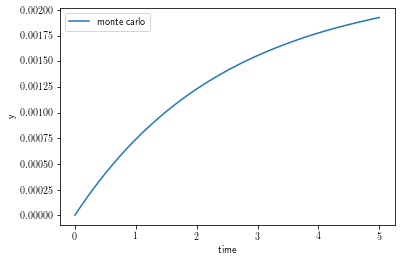

In [20]:
plt.figure()
#plt.plot(res2.time_grid, y_bar, label="y bar")
plt.plot(res2.time_grid, res2.y_bar, label="monte carlo")
plt.legend()
plt.xlabel("time")
plt.ylabel("y")

In [157]:
res2.x[0,:]

array([ 0.        , -0.00216938, -0.00439405, -0.00258445, -0.00063758,
       -0.00121175,  0.00513097, -0.00035953, -0.00389   ,  0.00390269,
        0.00297325,  0.00783312,  0.00938845,  0.01069665,  0.00999396,
        0.01074797,  0.01653813,  0.0116707 ,  0.01854514,  0.01856824,
        0.01802076,  0.01377238,  0.01035104,  0.00790246,  0.01708097,
        0.01795808,  0.0234475 ,  0.02027833,  0.02535539,  0.02905335,
        0.02510104,  0.02302112,  0.02543538,  0.02538879,  0.02573902,
        0.0225613 ,  0.02192395,  0.01888998,  0.01646003,  0.02244528,
        0.01956646,  0.01813975,  0.0197051 ,  0.02443461,  0.02492566,
        0.02016549,  0.02610133,  0.02268373,  0.02133774,  0.02021791,
        0.02274359,  0.02533996,  0.0235772 ,  0.02005273,  0.01565698,
        0.01192558,  0.00943328,  0.00691823,  0.0072315 ,  0.00085894,
        0.00344195, -0.00107764,  0.00441096, -0.00373395,  0.00414224,
        0.01015147,  0.01122141,  0.01029535,  0.00922155,  0.01

In [63]:
res2.y[0, :]

array([0.        , 0.0025    , 0.00499448, 0.00741949, 0.00985601,
       0.01239571, 0.01485209, 0.01722792, 0.01971741, 0.02223448,
       0.0246398 , 0.02704953, 0.02935152, 0.03155001, 0.03372442,
       0.03564885, 0.03736491, 0.03899457, 0.04050213, 0.04200718,
       0.0434054 , 0.04466204, 0.04601236, 0.04731887, 0.04860686,
       0.04975644, 0.05084461, 0.05192315, 0.05289779, 0.05388473,
       0.05481254, 0.05570577, 0.0565438 , 0.05750105, 0.05844258,
       0.05929184, 0.0601885 , 0.06098295, 0.06178174, 0.06243353,
       0.06299265, 0.06355992, 0.06416975, 0.06478528, 0.06538757,
       0.06596484, 0.06644273, 0.06687464, 0.06727818, 0.06774467,
       0.06823074, 0.06860562, 0.06900022, 0.069372  , 0.06970473,
       0.07007477, 0.07050765, 0.07099834, 0.07143288, 0.0718473 ,
       0.07228226, 0.07277909, 0.07324212, 0.07369172, 0.07406925,
       0.07437388, 0.0747301 , 0.07517298, 0.07561049, 0.07611416,
       0.07664065, 0.07711974, 0.07762221, 0.07823139, 0.07883

In [60]:
res2.time_grid

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
       1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
       1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16,
       2.2 , 2.24, 2.28, 2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 ,
       2.64, 2.68, 2.72, 2.76, 2.8 , 2.84, 2.88, 2.92, 2.96, 3.  , 3.04,
       3.08, 3.12, 3.16, 3.2 , 3.24, 3.28, 3.32, 3.36, 3.4 , 3.44, 3.48,
       3.52, 3.56, 3.6 , 3.64, 3.68, 3.72, 3.76, 3.8 , 3.84, 3.88, 3.92,
       3.96, 4.  ])

In [45]:
def test_swap_approximator(res: ResultSimulatorObj, swap, swap_pricer):
    sample = 0
    x = res.x[sample, :]
    y = res.y[sample, :]
    

In [56]:
swap_price_actual = swap_pricer.price(swap, res2.x, res2.y, res2.time_grid)

TypeError: only size-1 arrays can be converted to Python scalars

In [54]:
swap_price_actual

array([[0.06090907, 0.07125378, 0.06815417, ..., 0.02011785, 0.02277636,
        0.02123082],
       [0.06090907, 0.03130273, 0.02305737, ..., 0.21446088, 0.21787764,
        0.19413985],
       [0.06090907, 0.06832344, 0.08008684, ..., 0.20810596, 0.22844115,
        0.24503306],
       ...,
       [0.06090907, 0.04876587, 0.02371971, ..., 0.01076787, 0.00998288,
        0.02058997],
       [0.06090907, 0.08184915, 0.05944701, ..., 0.28541138, 0.26609248,
        0.28325862],
       [0.06090907, 0.06417531, 0.03207403, ..., 0.22634087, 0.21859002,
        0.2056082 ]])